# Assignment 4
### Question 1
#### Read and summarize the subsection on "Another Formulation for Ridge Regression and the Lasso" (pp 220-222).

<font size=2.5 color="red">Answer: 
This subsection introduces a new formulation for lasso and ridge regression. Instead of using λ before the penalty terms $ \sum_{j=1}^p |\beta_j| $ or $ \sum_{j=1}^p \beta_j^2 $, this formulation uses s to minimize the penalty terms such that $ \sum_{j=1}^p |\beta_j| \leq s $ or $ \sum_{j=1}^p \beta_j^2 \leq s $, which tries to find the set of coefficient estimates with the smallest RSS. When s is very large, the coefficient estimates can be large, too. It's basically yielding the least squares solutions. On the other hand, the coefficient estimates would be very small when s is set small. 

Moreover, the subsection also mentions the connection between the lasso, ridge regression and the best subset selection. Ridge and lasso regression can be regarded as computationally feasible alternatives to best subset selection.

Last but not least, "The Variable Selection Property of the Lasso" draws two figures showing the difference between lasso and ridge regression, which explains why lasso can result in zero coefficient estimates whereas ridge cannot. It's due to the shape of the constraint regions. The ridge regression has a circular constraint with no sharp points, the intersection with the RSS ellipse will not generally occur on an axis. In contrast, the lasso constraint has corners at each of the axes, and so the ellipse will often intersect the constraint region at an axis. That's how we get a zero coefficient.
</font>



### Question 2
#### In this exercise, we will generate simulated data, then use this data to perform forward feature selection, backward feature selection and lasso.

(a) Generate a predictor X of length n = 100, as well as a noise vector ϵ of length n = 100 from a
random normal distribution. Then generate a response vector Y of length n = 100 according to the
model Y = β0 + β1X + β2X2 + β3X3 + ϵ, where β0, β1, β2, and β3 are constants of your choice. Hint:
Look back at Assignment 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(seed=666)


X = np.random.normal(0, 1, 100)

eps = 0.1 * np.random.normal(0, 0.25, 100)

ß0 = 20
ß1 = 21
ß2 = 22
ß3 = 23

y = ß0 + ß1*X + ß2*X*X + ß3*X*X*X + eps

(b) Using forward stepwise selection and also using backwards stepwise selection to choose the best model containing the predictors X, X2, ... X6. Comment on your results.

### First we get the predictors X, X2, ... X6. 

In [3]:
X = pd.DataFrame(X)
X2 = X*X
X3 = X*X*X
X4 = X2*X2
X5 = X2*X3
X6 = X3*X3

X_1to6 = pd.concat([X, X2, X3, X4, X5, X6], axis=1)
X_1to6.columns = ["X", "X^2", "X^3", "X^4", "X^5", "X^6"]
X_1to6.head()

,X,X^2,X^3,X^4,X^5,X^6
0,0.824188,0.679286,0.559859,0.461429,0.380305,0.313443
1,0.479966,0.230367,0.110569,0.053069,0.025471,0.012225
2,1.173468,1.377027,1.615897,1.896204,2.225135,2.611124
3,0.909048,0.826368,0.751209,0.682885,0.620775,0.564314
4,-0.571721,0.326865,-0.186876,0.106841,-0.061083,0.034923


### Using forward stepwise selection

In [4]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
# Set forward=True, we get Step Forward Selection
sfs = SFS(lr_model, 
           k_features=6, 
           forward=True, 
           floating=False, 
           scoring='r2',
           cv=0,
           n_jobs=-1).fit(X_1to6, y)


sfs.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.93488272]),
  'avg_score': 0.9348827179222889,
  'feature_names': ('X^3',)},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([0.99037122]),
  'avg_score': 0.9903712230101999,
  'feature_names': ('X^2', 'X^3')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.99999997]),
  'avg_score': 0.9999999677441613,
  'feature_names': ('X', 'X^2', 'X^3')},
 4: {'feature_idx': (0, 1, 2, 4),
  'cv_scores': array([0.99999997]),
  'avg_score': 0.9999999681439081,
  'feature_names': ('X', 'X^2', 'X^3', 'X^5')},
 5: {'feature_idx': (0, 1, 2, 4, 5),
  'cv_scores': array([0.99999997]),
  'avg_score': 0.9999999682392479,
  'feature_names': ('X', 'X^2', 'X^3', 'X^5', 'X^6')},
 6: {'feature_idx': (0, 1, 2, 3, 4, 5),
  'cv_scores': array([0.99999997]),
  'avg_score': 0.9999999687670095,
  'feature_names': ('X', 'X^2', 'X^3', 'X^4', 'X^5', 'X^6')}}

### Using backwards stepwise selection

In [5]:
# Set forward=False, we get Step Backward Selection
lr_model2 = LinearRegression()
sbs = SFS(lr_model2, 
           k_features=1, 
           forward=False, 
           floating=False, 
           scoring='r2',
           cv=0,
           n_jobs=-1).fit(X_1to6.values, y)

sbs.subsets_

{6: {'feature_idx': (0, 1, 2, 3, 4, 5),
  'cv_scores': array([0.99999997]),
  'avg_score': 0.9999999687670095,
  'feature_names': ('0', '1', '2', '3', '4', '5')},
 5: {'feature_idx': (0, 1, 2, 3, 5),
  'cv_scores': array([0.99999997]),
  'avg_score': 0.9999999685256091,
  'feature_names': ('0', '1', '2', '3', '5')},
 4: {'feature_idx': (0, 1, 2, 5),
  'cv_scores': array([0.99999997]),
  'avg_score': 0.9999999679419835,
  'feature_names': ('0', '1', '2', '5')},
 3: {'feature_idx': (0, 1, 2),
  'cv_scores': array([0.99999997]),
  'avg_score': 0.9999999677441613,
  'feature_names': ('0', '1', '2')},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([0.99037122]),
  'avg_score': 0.9903712230101999,
  'feature_names': ('1', '2')},
 1: {'feature_idx': (2,),
  'cv_scores': array([0.93488272]),
  'avg_score': 0.9348827179222889,
  'feature_names': ('2',)}}

<font size=2.5 color="red">
On the one hand, we find feature (2,), (1, 2), (0, 1, 2), (0, 1, 2, 4), (0, 1, 2, 4, 5) and (0, 1, 2, 3, 4, 5) using forward stepwise selection.
    <br><br>On the other hand, we find feature (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 5)，(0, 1, 2, 5), (0, 1, 2), (1, 2) and (2,) using backward stepwise selection.
    <br><br>As we can see from the results, the subsets are different when k equals to 4 and 5 (we select 4 or 5 features as the subset). We have the same 6 features since we only have 6 features in our dataset. But when k equals to 1, 2, 3, the two methods give the same result.
</font>

(c) Now fit a lasso model to the simulated data, again using X, X2, ... X6 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates and discuss the results obtained.

In [6]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

In [7]:
λ_list = list(np.arange(1e-06, 3, 1e-03))

In [8]:
%%time

best_score = 0
best_λ = 0
cv_scores = []
for λ in λ_list:    
    lasso_model = Lasso(alpha=λ, max_iter = 100000)
    cv_score = cross_val_score(lasso_model,X_1to6, y, cv=5).mean()
    cv_scores.append(cv_score)
    if best_score < cv_score:
        best_score = cv_score
        best_λ = λ

Wall time: 1min 15s


Text(0, 0.5, 'cross validation score')

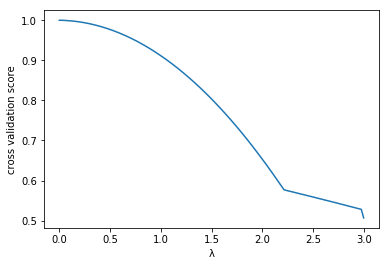

In [9]:
%matplotlib inline

plt.plot(λ_list, cv_scores)
plt.xlabel("λ")
plt.ylabel("cross validation score")

In [10]:
print("we test {} λ in total.".format(len(λ_list)))
print("best cv score is ", best_score)
print("current λ is ", best_λ)

we test 3000 λ in total.
best cv score is  0.9999667230827649
current λ is  0.014001


In [11]:
best_lasso_model = Lasso(alpha=best_λ).fit(X_1to6, y)
print("This is the intercept, AKA ß0: ", best_lasso_model.intercept_)
print("This is the coefficients: ", best_lasso_model.coef_)


This is the intercept, AKA ß0:  19.901520821071063
This is the coefficients:  [ 2.11102342e+01  2.24679721e+01  2.29006684e+01 -2.27382154e-01
  4.54017458e-03  1.72669876e-02]


<font size=2.5 color="red">
    The resulting coefficient estimates are ß0 =  19.90, ß1 = 21.11, ß2 = 22.47, ß3 = 22.90, ß4 = -0.23, ß5 = 0.0045, ß6 = 0.017.
    The ß0, ß1, ß2, ß3 are very close to my simulation setting. If we round the results to integers, they are exactly the same coefficients as my presetting. And the ß4, ß5 and ß6 are fairly small numbers compared to the ß0, ß1, ß2, ß3.
    
</font>

### Question 3
#### Read slides 20-32 and summarize them and add the summary at the end of assignment 4.

<font size=2.5 color="red">
    We need approaches to estimate test error in order to choose the optimal model, because RSS and $R^2$ are only related to the training error. We can either directly estimate the test error (using a validation set approach or cross-validation approach) or indirectly estimate the test eorror by making an adjustment to the training error to account for the bias due to overfitting.
    <br><br>Directly estimate: We can compute the validation set error or cross-validation error for each model under consideration, and then select the model for which the resulting estimated test error is smallest.
    <br><br>Indirectly estimate: We can also use $C_p$, AIC, BIC and Adjusted $R^2$. The $C_p$ statistic adds a penalty to the training RSS to adjust for the fact that the training error tends to underestimate the test error. The AIC criterion is defined for a large class of models fit by maximum likelihood. And the BIC criterion is derived from a Bayesian point of view, but ends up looking similar to $C_p$ and AIC as well. Moreover, the adjusted $R^2$ statistic pays a price for the inclusion of unnecessary variables in the model. As a consequence, we choose <b>lower</b> $C_p$ statistic, AIC, BIC values and <b>bigger</b> adjusted $R^2$ value. 
    
    
</font>